In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Preparing data

In [4]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [16]:
type(X)

numpy.ndarray

### Splitting data

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=10)


### Building the decision tree

In [7]:
dec_tree = DecisionTreeClassifier(max_depth= 3)

dec_tree.fit(X_train ,y_train)

DecisionTreeClassifier(max_depth=3)

### Making the predictions

In [8]:
y_pred = dec_tree.predict(X_test)

### Visualizing the tree model

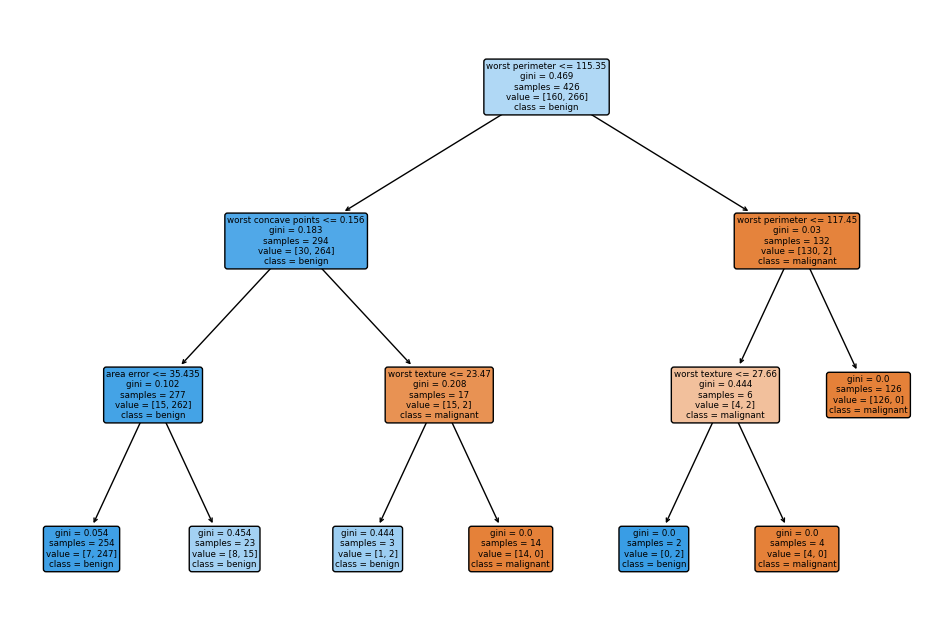

In [10]:
plt.figure(figsize=(12, 8))
plot_tree(dec_tree, filled=True, feature_names=list(cancer.feature_names), class_names=list(cancer.target_names), rounded=True)
plt.show()

### Evaluating the model

In [11]:
print(metrics.accuracy_score(y_test , y_pred))

0.9370629370629371


In [12]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[45  7]
 [ 2 89]]


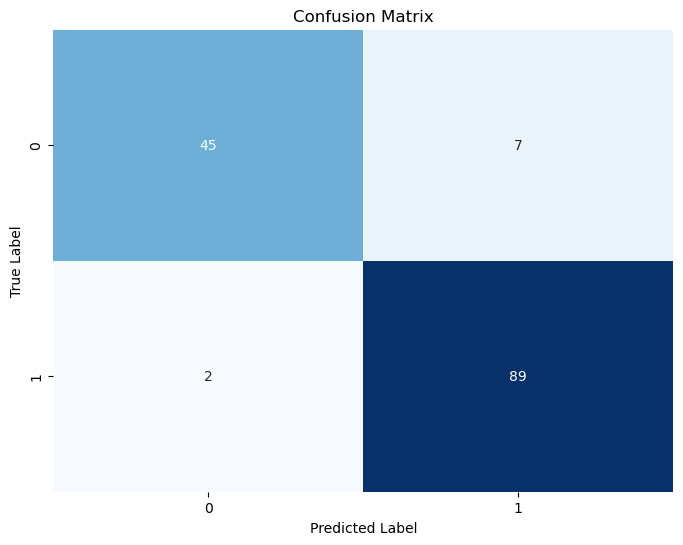

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=dec_tree.classes_, yticklabels=dec_tree.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
print(metrics.classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        52
           1       0.93      0.98      0.95        91

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143

